In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Paso 1: Cargar el conjunto de datos

Usaremos el conjunto de datos Iris, que contiene tres clases de flores

In [19]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

Visualizamos las primeras filas del conjunto de datos

In [20]:
print("Primeras filas del conjunto de datos:")
print(X.head())
print("\nEtiquetas de clase:")
print(data.target_names)

Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Etiquetas de clase:
['setosa' 'versicolor' 'virginica']


Paso 2: Análisis exploratorio de los datos

Visualizar las distribuciones de las características

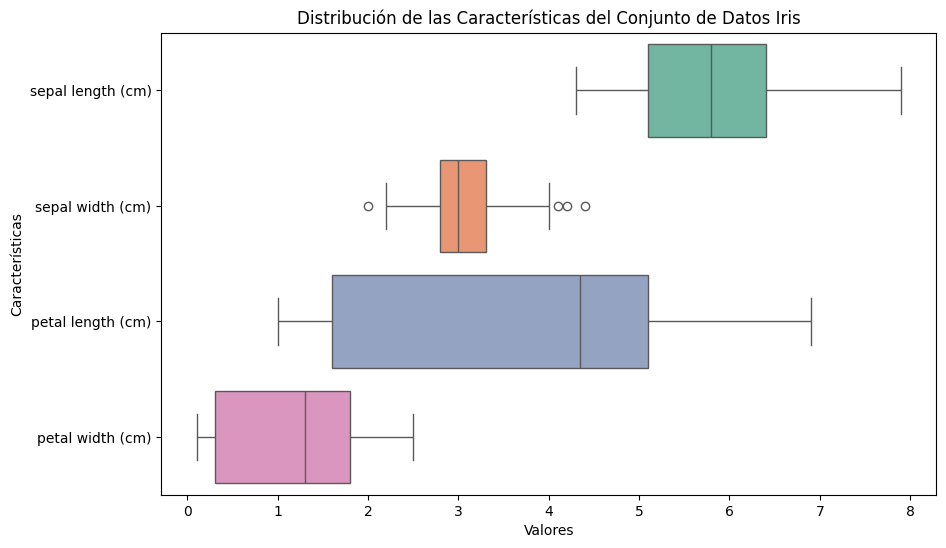

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, orient="h", palette="Set2")
plt.title("Distribución de las Características del Conjunto de Datos Iris")
plt.xlabel("Valores")
plt.ylabel("Características")
plt.show()

Visualizar las relaciones entre las características y las clases

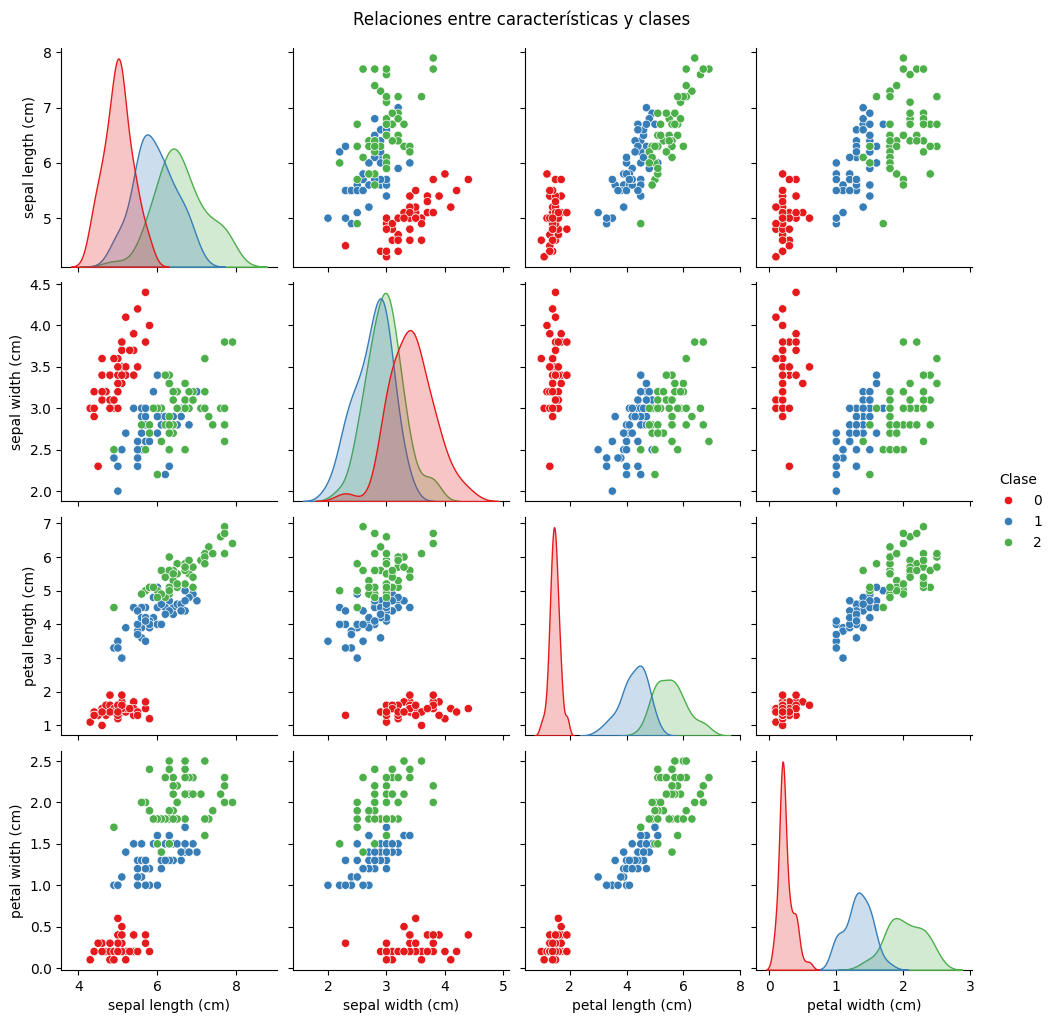

In [22]:
sns.pairplot(pd.concat([X, y.rename("Clase")], axis=1), hue="Clase", palette="Set1")
plt.suptitle("Relaciones entre características y clases", y=1.02)
plt.show()

Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Paso 4: Entrenar un modelo de Árbol de Decisión

Creamos un árbol con una profundidad máxima de 3 para facilitar la interpretación

In [24]:
modelo_arbol = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Paso 5: Visualización del Árbol de Decisión

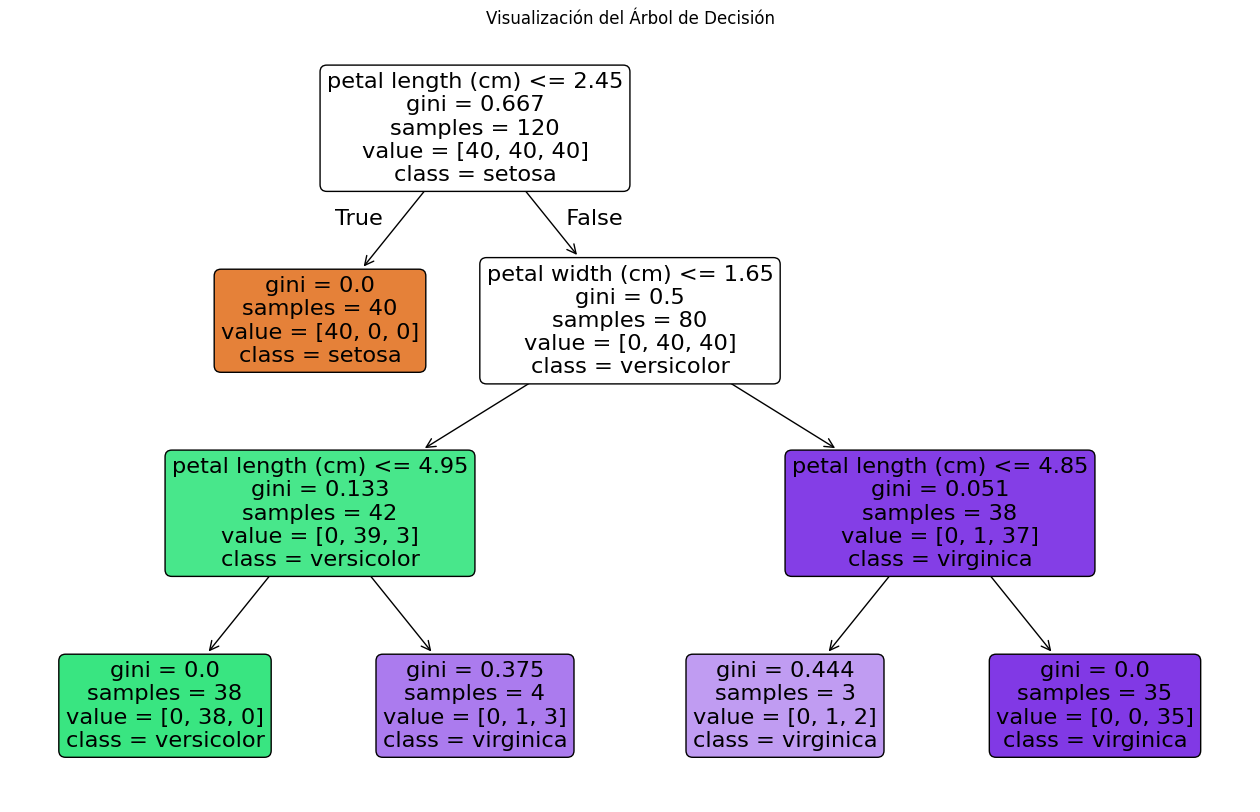

In [25]:
plt.figure(figsize=(16, 10))
plot_tree(modelo_arbol, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

Mostrar las reglas del árbol

In [26]:
print("\nReglas del Árbol de Decisión:")
arbol_texto = export_text(modelo_arbol, feature_names=data.feature_names)
print(arbol_texto)


Reglas del Árbol de Decisión:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



Paso 6: Realizar predicciones

In [27]:
y_pred = modelo_arbol.predict(X_test)
y_pred_prob = modelo_arbol.predict_proba(X_test)

Paso 7: Evaluar el desempeño del modelo

Matriz de confusión

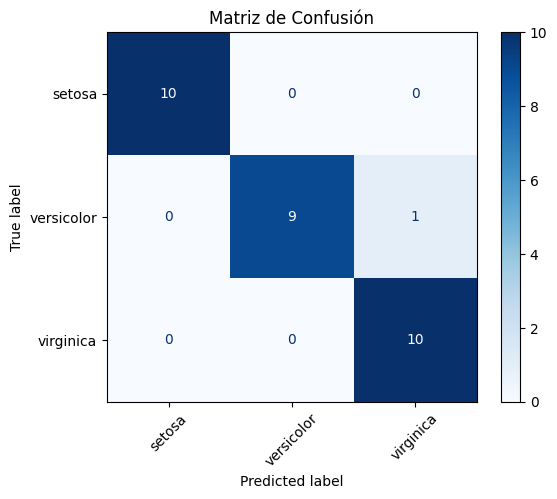

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=modelo_arbol.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
cmd.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.show()

Reporte de clasificación

In [29]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Precisión global

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión Global del Modelo: {accuracy:.2f}")

Precisión Global del Modelo: 0.97


Paso 8: Visualización de la importancia de las características

C:\Users\diego\AppData\Local\Temp\ipykernel_12400\379471849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=data.feature_names, palette="viridis")


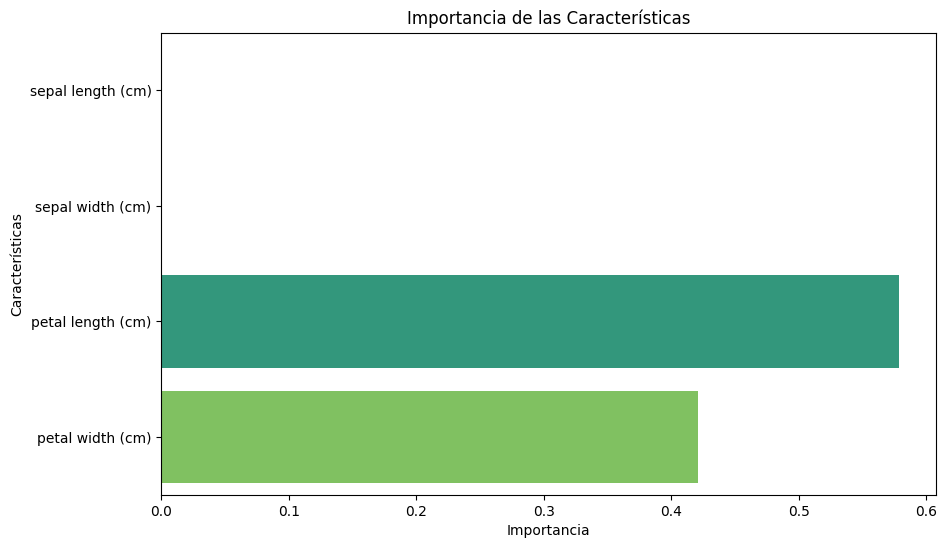

In [31]:
importancias = modelo_arbol.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=data.feature_names, palette="viridis")
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

Paso 10: Función para mostrar las fronteras de decisión

In [32]:
def show_boundaries(model, X, y, feature_names, class_names):
    """
    Visualiza las fronteras de decisión de un modelo en un espacio bidimensional.
    Solo se pueden usar dos características a la vez.

    Parámetros:
    - model: modelo de clasificación entrenado
    - X: características (solo las dos primeras columnas serán consideradas)
    - y: etiquetas de clase
    - feature_names: nombres de las características
    - class_names: nombres de las clases
    """
    if X.shape[1] != 2:
        raise ValueError("La visualización de fronteras de decisión requiere exactamente 2 características.")

    # Crear una malla de puntos
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualizar las fronteras
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Graficar los puntos de datos
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Fronteras de Decisión del Modelo")
    plt.legend(handles=scatter.legend_elements()[0], labels=class_names, title="Clases")
    plt.show()

Seleccionar dos características para visualizar las fronteras de decisión

In [33]:
X_2d = X.iloc[:, [0, 2]]  # Usaremos las columnas 0 (sepal length) y 2 (petal length)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42, stratify=y)

Entrenar el modelo con las características seleccionadas

In [34]:
modelo_arbol_2d = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
modelo_arbol_2d.fit(X_train_2d, y_train_2d)

DecisionTreeClassifier(max_depth=3, random_state=42)

Visualizar las fronteras de decisión

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

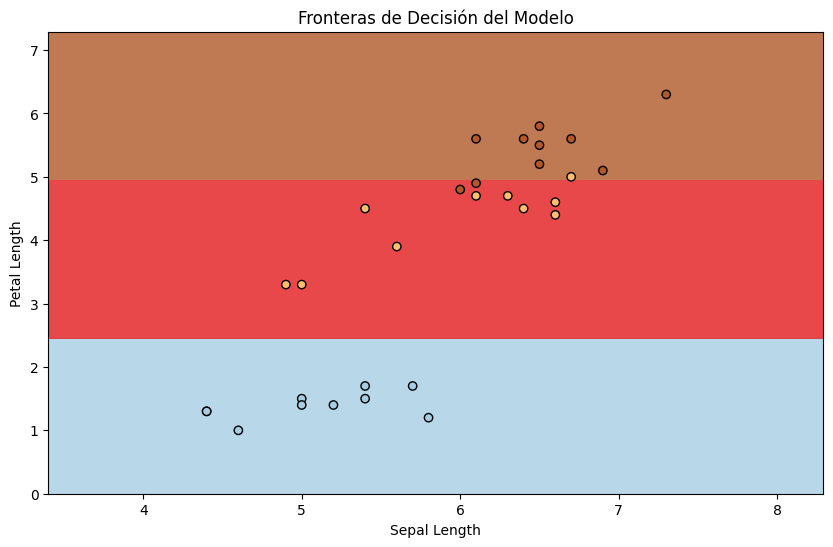

In [35]:
show_boundaries(modelo_arbol_2d, X_test_2d, y_test_2d, feature_names=["Sepal Length", "Petal Length"], class_names=data.target_names)